### SEATTLE AIRBNB BOOKING BUSINESS IN 2016

Let see something about AIRBNB Seattle booking situation. From this dataset, we will find the answers for 3 questions below:
1. How are the rooms situation at seattle?
2. How is the roomôbusiness in Seattle?
3. What make a host to become top booking?
 
    
    

### Section 1: Prepare Data

At first, we will import data and clean them:

In [14]:
# import the libraries

In [15]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# Get the directory: 
d = os.getcwd() + '\data\\'

In [17]:
# Download csv files from https://www.kaggle.com/datasets/airbnb/seattle
# We will only need calendar.csv and listings.csv about the booking over time and info of hosts in Seattle

# Calendar
df_cld = pd.read_csv(d + 'calendar.csv')
df_cld.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [14]:
# # Fill missing price value with value from rows above to get the latest price (data was already sorted by date)
# # Change type for 'price' column to float and 'date' column to date to calculate easily

df_cld['price'] = df_cld['price'].fillna(method='ffill')
df_cld['price'] = df_cld['price'].apply(lambda x: x.replace('$', '').replace(',', '') if type(x) != float else x)
df_cld['date'] = pd.to_datetime(df_cld['date'])
df_cld['price'] = df_cld['price'].astype('float')
df_cld

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,85.0
3,241032,2016-01-07,f,85.0
4,241032,2016-01-08,f,85.0
...,...,...,...,...
1393565,10208623,2016-12-29,f,87.0
1393566,10208623,2016-12-30,f,87.0
1393567,10208623,2016-12-31,f,87.0
1393568,10208623,2017-01-01,f,87.0


In [19]:
# Listings
df_lst = pd.read_csv(d + 'listings.csv')
df_lst.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,2.016010e+13,4/1/2016,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,2.016010e+13,4/1/2016,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,2.016010e+13,4/1/2016,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,2.016010e+13,4/1/2016,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,2.016010e+13,4/1/2016,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [20]:
# check df information
df_lst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   float64
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [21]:
# change type of 'price' and 'date' column (easier to calculate)
df_lst['price'] = df_lst['price'].apply(lambda x: x.replace('$', '').replace(',', '') if type(x) != float else x)
df_lst['price'] = df_lst['price'].astype('float32')


In [22]:
df_lst['date'] = pd.to_datetime(df_cld['date'])

In [11]:
# Create new data frame with necessary columns
cols = ['id','name','host_total_listings_count','smart_location','property_type','room_type','accommodates','bathrooms','bedrooms','beds','price',
                   'guests_included','neighbourhood','minimum_nights','number_of_reviews','review_scores_rating']
df_info = df_lst[cols]
df_info.head(3)

,id,name,host_total_listings_count,smart_location,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,guests_included,neighbourhood,minimum_nights,number_of_reviews,review_scores_rating
0,241032,Stylish Queen Anne Apartment,3.0,"Seattle, WA",Apartment,Entire home/apt,4,1.0,1.0,1.0,85.0,2,Queen Anne,1,207,95.0
1,953595,Bright & Airy Queen Anne Apartment,6.0,"Seattle, WA",Apartment,Entire home/apt,4,1.0,1.0,1.0,150.0,1,Queen Anne,2,43,96.0
2,3308979,New Modern House-Amazing water view,2.0,"Seattle, WA",House,Entire home/apt,11,4.5,5.0,7.0,975.0,10,Queen Anne,4,20,97.0


### Section 2: ANALYTIC

### First: How are the hosts in Seattle in 2016?

### Scale of places for renting

We consider the scale of places in Seattle to know how big are the places in Seattle in 2016

In [12]:
#Seperate the number of beds into 3 types and count the numbers of places per type
place_scale_df = df_info[['id', 'beds']].dropna()
place_scale_df['beds_range'] = pd.cut(place_scale_df['beds'], bins=3)
df_2 = place_scale_df.groupby('beds_range')['beds'].count()
df_2.index = list(map(lambda x: str(x)[1:-1].replace(',', ' ->'), list(df_2.index)))
df_2
    

0.986 -> 5.667     3771
5.667 -> 10.333      45
10.333 -> 15.0        1
Name: beds, dtype: int64

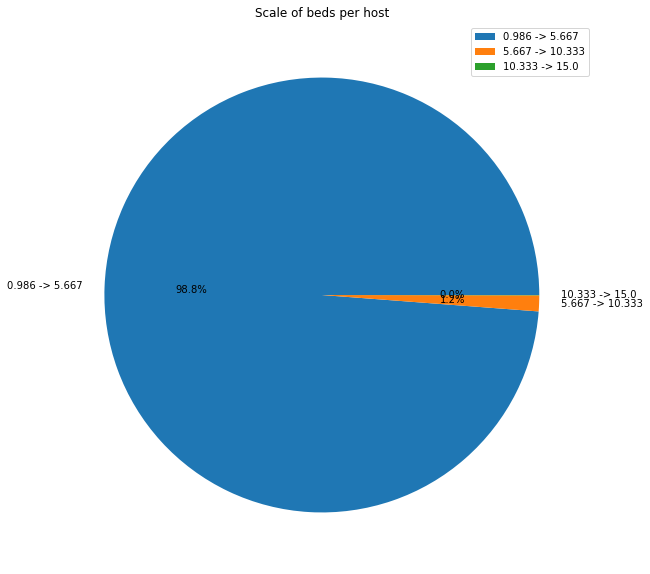

In [110]:
#Visualize the figures to pie chart

plt.figure(figsize=(20,10))
plt.pie(df_2, labels = df_2.index, autopct='%1.1f%%' )
plt.legend()
plt.title('Scale of beds per host')
plt.show()

In general, most of the places for renting rooms are small in size with the number of beds less than 5 (accounting for nearly 98.8%), the rest is in the mid-range with 5-10 beds, accounting for about 1,2% and only 1 large-scale establishment with more than 10 beds

### ROOM TYPE


In [23]:
#Count the numbers of places per type of room

df_room_type = df_info['room_type'].value_counts()
df_room_type

Entire home/apt    2541
Private room       1160
Shared room         117
Name: room_type, dtype: int64

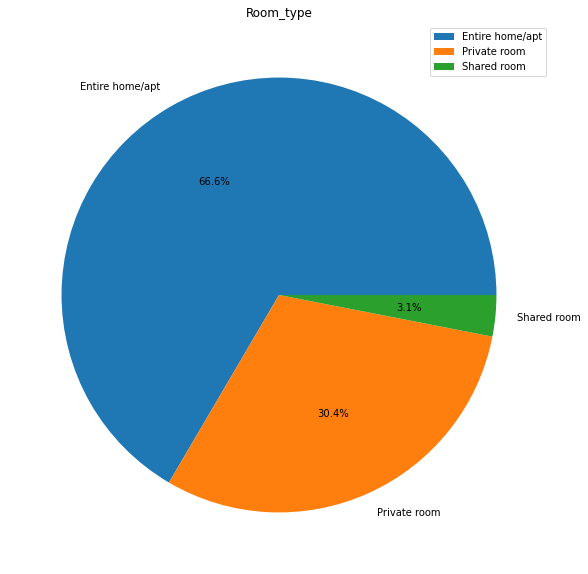

In [89]:
#Visualize the figures to pie chart

plt.figure(figsize=(20,10))
plt.pie(df_room_type, labels = df_room_type.index, autopct='%1.1f%%' )
plt.legend()
plt.title('Room_type')
plt.show()

In the other hand, there are totally 3818 places for rentings in Seatle. Most of them are Entire home/apartment ( about 2/3 total rooms), the second is Private room (about 30.4%) and approximately 3,1% are Shared room

### Second: How is the business of hosts in Seattle in 2016?

### BOOKING AND REVENUE

In [15]:
# creat data frame show booking in 2016
df_booked = df_cld[df_cld['available'] == 'f']
df_booked

,listing_id,date,available,price
2,241032,2016-01-06,f,85.0
3,241032,2016-01-07,f,85.0
4,241032,2016-01-08,f,85.0
5,241032,2016-01-09,f,85.0
6,241032,2016-01-10,f,85.0
...,...,...,...,...
1393565,10208623,2016-12-29,f,87.0
1393566,10208623,2016-12-30,f,87.0
1393567,10208623,2016-12-31,f,87.0
1393568,10208623,2017-01-01,f,87.0


In [34]:
 #business situation over time (2016)
df_business = df_booked.groupby('date').agg({'available': 'count', 'price':'sum'}).reset_index()
df_business

,date,available,price
0,2016-01-04,2083,275030.0
1,2016-01-05,1951,257100.0
2,2016-01-06,1992,257241.0
3,2016-01-07,2042,262425.0
4,2016-01-08,2036,258124.0
...,...,...,...
360,2016-12-29,983,133304.0
361,2016-12-30,978,132255.0
362,2016-12-31,959,127499.0
363,2017-01-01,896,115992.0


Text(0.5, 1.0, 'Booked over time')

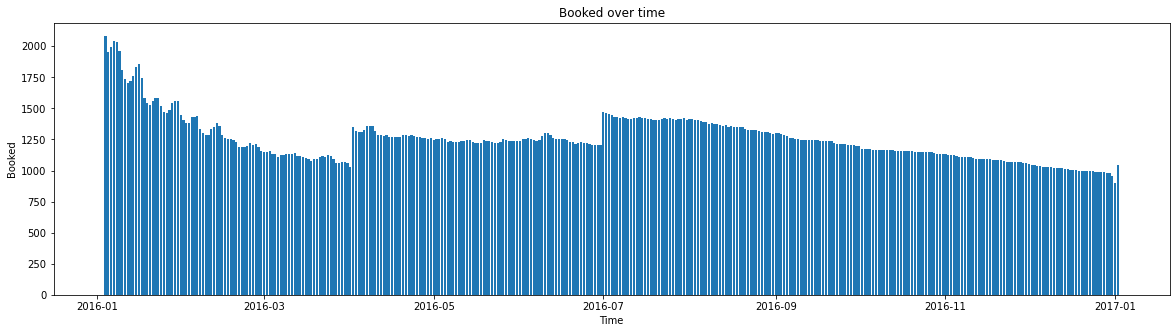

In [41]:
#Visualize the figures to bar chart view the number of bookings over time 
plt.figure(figsize=(20,5))
plt.bar(df_business['date'],df_business['available'])
plt.xlabel('Time')
plt.ylabel('Booked')
plt.title('Booked over time')

Text(0.5, 1.0, 'Revenue over time')

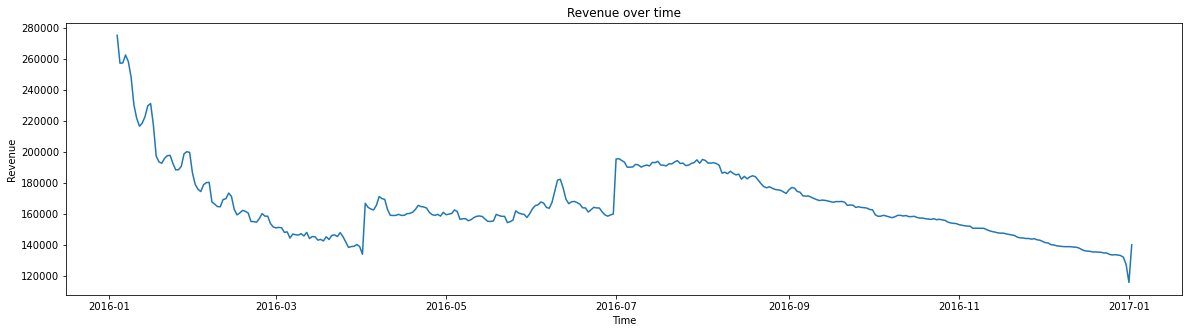

In [40]:
#Visualize the figures to line chart to view the trend of revenue during 2016
plt.figure(figsize=(20,5))
plt.plot(df_business['date'],df_business['price'])
plt.xlabel('Time')
plt.ylabel('Revenue')
plt.title('Revenue over time')

#As found in the diagram underneath, the booking pattern is by all accounts split in three sections. While the bars cover the complete income and the line shows the accessibility rate, those two measurements are very equal and pursue the generally speaking previously mentioned directions.
#The first piece from January to March shows a precarious slant then unexpected increment occurs in the following month. Another spike happens in the start of July and it's sliding again until the end of the year.
It muddled caused these patterns, whether it very well may be inside or outside factors.

### Third: What makes a  host more attractive to tenants?


### TOP BOOKING

We will take a look at the top 10% of rental locations that are most popular among users and find something that make these places to become the best choices

In [18]:
#count the number of days had been booked each places
df_booked_1 = df_booked.groupby('listing_id').agg({'available': 'count', 'price':'sum'}).sort_values(by=['available'], ascending = False)
df_booked_1

,available,price
listing_id,,
3993960,365,31025.0
8811945,365,41975.0
1030411,365,37960.0
9910189,365,61685.0
3593582,365,54750.0
...,...,...
8009814,1,400.0
1880734,1,545.0
4659824,1,105.0


In [19]:
# To know how to become a hot hosts, We will study a set of hotels that are certain hot booking, 
# There are approximately 3000 hosts in this list so, we will choose about 10% the hosts - about 300 hosts to research them
# 10% most booking place
df_booked_top = df_booked_1.head(int(len(df_booked_1)*0.1))
df_booked_top

,available,price
listing_id,,
3993960,365,31025.0
8811945,365,41975.0
1030411,365,37960.0
9910189,365,61685.0
3593582,365,54750.0
...,...,...
10188794,331,33100.0
8782852,330,54450.0
9241055,330,13200.0


In [20]:
# list the id of best places
cols1 = list(df_booked_1.index)
cols1

[3993960,
 8811945,
 1030411,
 9910189,
 3593582,
 5123904,
 3534444,
 3533112,
 5229971,
 5308339,
 7437784,
 10035274,
 3386862,
 445199,
 3345341,
 7420339,
 1049293,
 4053644,
 3215404,
 5538663,
 9562586,
 9939025,
 5625964,
 3124961,
 4737727,
 7581974,
 5686178,
 3793406,
 4030600,
 4208555,
 4211836,
 9900303,
 284813,
 3930681,
 8339428,
 9364302,
 4297068,
 3812725,
 3783162,
 3728802,
 4454121,
 8441263,
 4507137,
 3773700,
 4550099,
 4557204,
 3766285,
 3759039,
 4688603,
 4701141,
 7382368,
 5489676,
 7922676,
 6403878,
 6477225,
 6489648,
 10015967,
 6626493,
 9939359,
 6706377,
 1762354,
 6744143,
 6750264,
 777159,
 6765045,
 8369321,
 8171726,
 6808970,
 6822322,
 9975073,
 6824408,
 8194886,
 10339144,
 1209447,
 8241019,
 6993726,
 8253758,
 6436772,
 4122325,
 6210952,
 6342327,
 9095668,
 2426152,
 2350464,
 2277640,
 6226666,
 7952032,
 2489339,
 8717068,
 9699490,
 1961671,
 6091789,
 10020782,
 107046,
 2808357,
 9714078,
 656909,
 10210625,
 3819831,
 9868607,


In [86]:
# Statistics of prices of rental places, we will seperate them into 5 level of prices
price_top_booking_df = df_top_booking[['id', 'price']].dropna()
price_top_booking_df['price_range'] = pd.cut(price_top_booking_df['price'], bins=5)
df_1 = price_top_booking_df.groupby('price_range')['price'].count()
df_1.index = list(map(lambda x: str(x)[1:-1].replace(',', ' ->'), list(df_1.index)))
df_1
    
 

19.02 -> 216.0     2791
216.0 -> 412.0      295
412.0 -> 608.0       41
608.0 -> 804.0        9
804.0 -> 1000.0       4
Name: price, dtype: int64

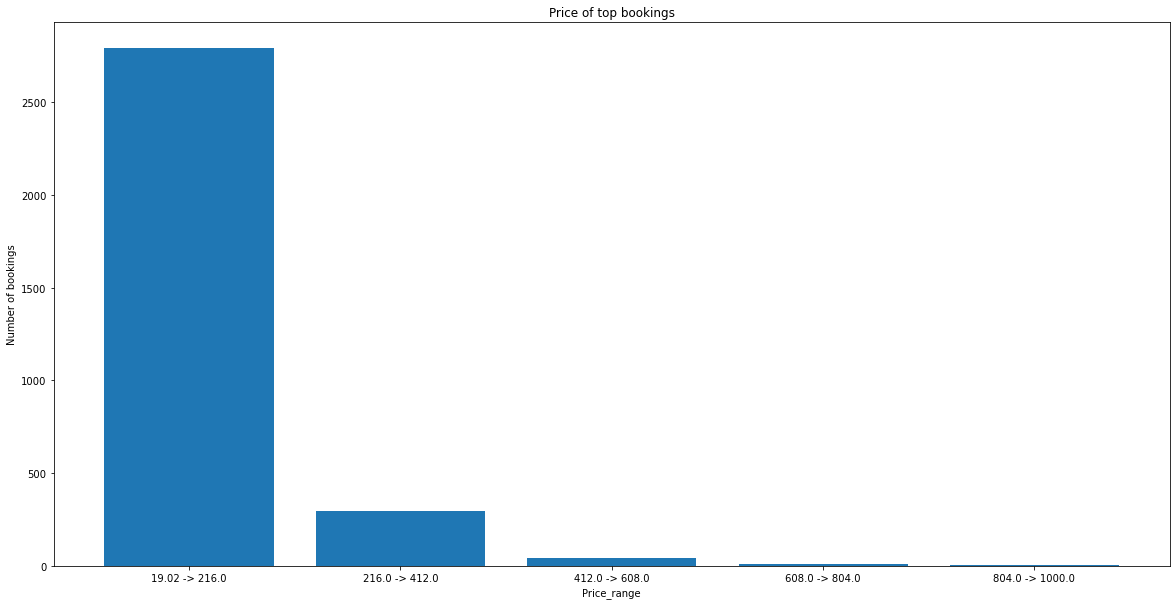

In [119]:
plt.figure(figsize=(20,10))        
plt.bar(df_1.index, df_1.values)

plt.xlabel('Price_range')
plt.ylabel('Number of bookings')
plt.title('Price of top bookings')
plt.show()

In [120]:
# From the data of Seatles 2016, it is easily to see that when renting a room, people will prioritize the price criteria first. 
# The proof for this statement is that when we consider 10% of the rental places with the most booked days of the year, most of them are places with affordable prices - about 2791 places have range-price are 19.02-216 $  per night. 
# Next, there are 295 units have price from 216-412$. The others are 412-608$: 41 places, 608-804$: 9 places and only 4 places has the range of price about 804-1000$. 

In [ ]:
# The neighbourhood of top booking

 The surrounding landscape also greatly affects the decision to choose a place to rent a room. Let see top 10% hot booking places are in what neighbourhood.

In [71]:
df_neighbourhood = df_top_booking['neighbourhood'].value_counts()
df_neighbourhood

Capitol Hill          293
Ballard               190
Belltown              189
Queen Anne            166
Minor                 152
                     ... 
South Beacon Hill       2
Pike Market             2
South Park              2
Pinehurst               2
North College Park      1
Name: neighbourhood, Length: 79, dtype: int64

In [76]:
# because most of neighbourhoods have the number of hosts below than 100, so we select the neighbourhood where have more than 100 hosts
top = df_neighbourhood.values >100
top_neighbourhood = pd.Series(df_neighbourhood.values[top], df_neighbourhood.index[top])
top_neighbourhood

Capitol Hill    293
Ballard         190
Belltown        189
Queen Anne      166
Minor           152
Fremont         126
Wallingford     124
First Hill      102
dtype: int64

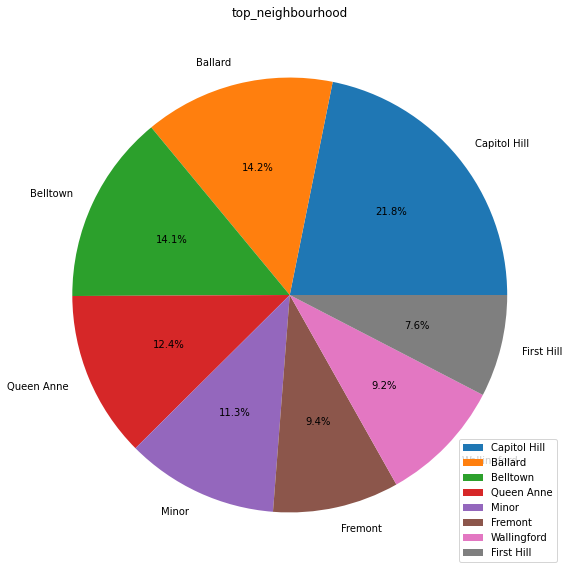

In [78]:
  plt.figure(figsize=(20,10))
plt.pie(top_neighbourhood, labels = top_neighbourhood.index, autopct='%1.1f%%' )
plt.legend(loc='lower right')
plt.title('top_neighbourhood')
plt.show()

The figures show that Capitol Hill is the area with the most room rental locations (about 293 places, accounted for 21.8%). The second and the third are Ballard and Belltown with 190 and 189 places. It seem like these neighbourhood are very suitable for business in motels, hotels

### CONCLUSION

In this article, we investigated Seattle Airbnb in 2016 as per Kaggle dataset:
1. From the abrupt spike in information, we can explore further and sort out what occurred during that specific period.
2. Seattle seems to be a pretty big market of Airbnb and 
    the room rental will take place in 3 cycles / year, each period is 3-4 months long
3. We can find some reason why a place can attract more customers: 
    - It is important to choose where you can open a hotel, hostel or a place for renting room. 
    - The price is always the priority criteria of people when they choose a host